In [31]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 

In [32]:
df_income2019 = pd.read_csv('/home/ls283h/Work/SIMD/Derived_data/SIMD2020-Income_domain_for_external_QA.csv')

df_income2019.head()

Datazones Intermediate zone Local authority Count  Income Domain (%)  \
0  S01006506            Culter   Aberdeen City    71                8.0   
1  S01006507            Culter   Aberdeen City    43                5.0   
2  S01006508            Culter   Aberdeen City    40                6.0   
3  S01006509            Culter   Aberdeen City    52               10.0   
4  S01006510            Culter   Aberdeen City    68               10.0   

     Rank  Scottish Working-age population data  Scottish Population data  
0  4044.0                                   577                       894  
1  4675.0                                   465                       793  
2  4784.0                                   456                       624  
3  3193.0                                   301                       537  
4  3305.0                                   413                       663

In [33]:
df_income2019.shape

(6976, 8)

In [34]:
# Check for missing values
df_income2019.isna().sum()

Datazones                               0
Intermediate zone                       0
Local authority                         0
Count                                   0
Income Domain (%)                       4
Rank                                    4
Scottish Working-age population data    0
Scottish Population data                0
dtype: int64

In [35]:
# identify datazones with missing values
df_income2019[df_income2019.isna().any(axis=1)]

Datazones Intermediate zone    Local authority Count  Income Domain (%)  \
2006  S01008512     Craiglockhart  City of Edinburgh     -                NaN   
3700  S01010206        Petershill       Glasgow City     -                NaN   
3720  S01010226         Sighthill       Glasgow City     0                NaN   
3721  S01010227         Sighthill       Glasgow City     -                NaN   

      Rank  Scottish Working-age population data  Scottish Population data  
2006   NaN                                   320                       522  
3700   NaN                                     0                         0  
3720   NaN                                     0                         0  
3721   NaN                                     0                         0

In [36]:
# drop records with missing values
df_income2019.dropna(inplace=True)

In [37]:
# Check the number of datazones is 6976 - 4 
df_income2019.shape

(6972, 8)

In [38]:
# Select all duplicate rows based on one column
df_income2019[df_income2019.duplicated(['Datazones'])]

Empty DataFrame
Columns: [Datazones, Intermediate zone, Local authority, Count, Income Domain (%), Rank, Scottish Working-age population data, Scottish Population data]
Index: []

In [39]:
df_income2019 = df_income2019.iloc[:,[0,1,2,3,7]]
df_income2019.head()

Datazones Intermediate zone Local authority Count  Scottish Population data
0  S01006506            Culter   Aberdeen City    71                       894
1  S01006507            Culter   Aberdeen City    43                       793
2  S01006508            Culter   Aberdeen City    40                       624
3  S01006509            Culter   Aberdeen City    52                       537
4  S01006510            Culter   Aberdeen City    68                       663

In [40]:
df_income2019.dtypes

Datazones                   object
Intermediate zone           object
Local authority             object
Count                       object
Scottish Population data     int64
dtype: object

In [41]:
# calculate percentage of income deprivation in 2019 data
df_income2019 = df_income2019.astype({'Count': 'int64'})
df_income2019['Income_dpvn_2019_%'] = df_income2019['Count'] * 100 / df_income2019['Scottish Population data']
df_income2019 = df_income2019.round({'Income_dpvn_2019_%': 1})
df_income2019.head()

Datazones Intermediate zone Local authority  Count  \
0  S01006506            Culter   Aberdeen City     71   
1  S01006507            Culter   Aberdeen City     43   
2  S01006508            Culter   Aberdeen City     40   
3  S01006509            Culter   Aberdeen City     52   
4  S01006510            Culter   Aberdeen City     68   

   Scottish Population data  Income_dpvn_2019_%  
0                       894                 7.9  
1                       793                 5.4  
2                       624                 6.4  
3                       537                 9.7  
4                       663                10.3

In [42]:
df_income2019.rename(columns={'Count': 'Income_count_2019', 'Scottish Population data': 'Total_pop_2019'}, inplace=True)
df_income2019.head()

Datazones Intermediate zone Local authority  Income_count_2019  \
0  S01006506            Culter   Aberdeen City                 71   
1  S01006507            Culter   Aberdeen City                 43   
2  S01006508            Culter   Aberdeen City                 40   
3  S01006509            Culter   Aberdeen City                 52   
4  S01006510            Culter   Aberdeen City                 68   

   Total_pop_2019  Income_dpvn_2019_%  
0             894                 7.9  
1             793                 5.4  
2             624                 6.4  
3             537                 9.7  
4             663                10.3

In [57]:
df_income2016 = pd.read_csv('/home/ls283h/Work/SIMD/Derived_data/00534452_income_2016.csv')
df_income2016.head()

Data_Zone  Total_population  Income_count
0  S01006506               904            60
1  S01006507               830            60
2  S01006508               694            30
3  S01006509               573            30
4  S01006510               676            70

In [58]:
df_income2016['Income_dpvn_2016_%'] = df_income2016.Income_count * 100 / df_income2016.Total_population
df_income2016 = df_income2016.round({'Income_dpvn_2016_%': 1})
df_income2016.head()

Data_Zone  Total_population  Income_count  Income_dpvn_2016_%
0  S01006506               904            60                 6.6
1  S01006507               830            60                 7.2
2  S01006508               694            30                 4.3
3  S01006509               573            30                 5.2
4  S01006510               676            70                10.4

In [59]:
df_income2016.rename(columns={'Data_Zone': 'Datazones', 'Total_population': 'Total_pop_2016', 'Income_count': 'Income_count_2016'}, inplace=True)
df_income2016.head()

Datazones  Total_pop_2016  Income_count_2016  Income_dpvn_2016_%
0  S01006506             904                 60                 6.6
1  S01006507             830                 60                 7.2
2  S01006508             694                 30                 4.3
3  S01006509             573                 30                 5.2
4  S01006510             676                 70                10.4

In [61]:
# merge 2019 and 2016 indexes
df_income1619 = pd.merge(df_income2019, df_income2016, on='Datazones')
df_income1619.head()

Datazones Intermediate zone Local authority  Income_count_2019  \
0  S01006506            Culter   Aberdeen City                 71   
1  S01006507            Culter   Aberdeen City                 43   
2  S01006508            Culter   Aberdeen City                 40   
3  S01006509            Culter   Aberdeen City                 52   
4  S01006510            Culter   Aberdeen City                 68   

   Total_pop_2019  Income_dpvn_2019_%  Total_pop_2016  Income_count_2016  \
0             894                 7.9             904                 60   
1             793                 5.4             830                 60   
2             624                 6.4             694                 30   
3             537                 9.7             573                 30   
4             663                10.3             676                 70   

   Income_dpvn_2016_%  
0                 6.6  
1                 7.2  
2                 4.3  
3                 5.2  
4                10.4

In [63]:
# estimate difference between income deprivation in 2019 and income deprivation in 2016
df_income1619["Income_dpvn_19-16_%"] = df_income1619["Income_dpvn_2019_%"] - df_income1619["Income_dpvn_2016_%"]

In [64]:
# Variation in the Total population, normalized by 2016
df_income1619['Total_pop_19-16'] = (df_income1619['Total_pop_2019'] - df_income1619['Total_pop_2016']) / df_income1619['Total_pop_2016']
df_income1619 = df_income1619.round({"Total_pop_19-16": 3})
df_income1619.head()

Datazones Intermediate zone Local authority  Income_count_2019  \
0  S01006506            Culter   Aberdeen City                 71   
1  S01006507            Culter   Aberdeen City                 43   
2  S01006508            Culter   Aberdeen City                 40   
3  S01006509            Culter   Aberdeen City                 52   
4  S01006510            Culter   Aberdeen City                 68   

   Total_pop_2019  Income_dpvn_2019_%  Total_pop_2016  Income_count_2016  \
0             894                 7.9             904                 60   
1             793                 5.4             830                 60   
2             624                 6.4             694                 30   
3             537                 9.7             573                 30   
4             663                10.3             676                 70   

   Income_dpvn_2016_%  Income_dpvn_19-16_%  Total_pop_19-16  
0                 6.6                  1.3           -0.011  
1                 7.2                 -1.8           -0.045  
2                 4.3                  2.1           -0.101  
3                 5.2                  4.5           -0.063  
4                10.4                 -0.1           -0.019

In [66]:
df_income1619 = df_income1619.iloc[:, [0,1,2,5,8,9,10]]
df_income1619.head()

Datazones Intermediate zone Local authority  Income_dpvn_2019_%  \
0  S01006506            Culter   Aberdeen City                 7.9   
1  S01006507            Culter   Aberdeen City                 5.4   
2  S01006508            Culter   Aberdeen City                 6.4   
3  S01006509            Culter   Aberdeen City                 9.7   
4  S01006510            Culter   Aberdeen City                10.3   

   Income_dpvn_2016_%  Income_dpvn_19-16_%  Total_pop_19-16  
0                 6.6                  1.3           -0.011  
1                 7.2                 -1.8           -0.045  
2                 4.3                  2.1           -0.101  
3                 5.2                  4.5           -0.063  
4                10.4                 -0.1           -0.019

# Distribution of values in 2016/2019

In [67]:
# create feature "Score_income_dpvn" based in the boxplot of feature "Income_dpvn_19-16_%"
q1 = df_income1619["Income_dpvn_19-16_%"].quantile(0.25)
q2 = df_income1619["Income_dpvn_19-16_%"].median()
q3 = df_income1619["Income_dpvn_19-16_%"].quantile(0.75)
iqr = q3 - q1
minimum = q1 - iqr
maximum = q3 + iqr

def ifelse(value):
    if value < minimum:
        return 1
    if minimum <= value < q1:
        return 2
    if q1 <= value < q2:
        return 3
    if q2 <= value <= q3:
        return 4
    if q3 < value <= maximum:
        return 5
    if value > maximum:
        return 6
    
df_income1619['Score_income_dpvn'] = df_income1619["Income_dpvn_19-16_%"].apply(ifelse)
df_income1619

/home/ls283h/python-virtual-environments/simd/lib/python3.6/site-packages/ipykernel_launcher.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


Datazones Intermediate zone Local authority  Income_dpvn_2019_%  \
0     S01006506            Culter   Aberdeen City                 7.9   
1     S01006507            Culter   Aberdeen City                 5.4   
2     S01006508            Culter   Aberdeen City                 6.4   
3     S01006509            Culter   Aberdeen City                 9.7   
4     S01006510            Culter   Aberdeen City                10.3   
...         ...               ...             ...                 ...   
6967  S01013477    Broxburn South    West Lothian                13.1   
6968  S01013478     Broxburn East    West Lothian                 9.1   
6969  S01013479     Broxburn East    West Lothian                18.3   
6970  S01013480     Broxburn East    West Lothian                 8.0   
6971  S01013481     Broxburn East    West Lothian                 3.0   

      Income_dpvn_2016_%  Income_dpvn_19-16_%  Total_pop_19-16  \
0                    6.6                  1.3           -0.011   
1                    7.2                 -1.8           -0.045   
2                    4.3                  2.1           -0.101   
3                    5.2                  4.5           -0.063   
4                   10.4                 -0.1           -0.019   
...                  ...                  ...              ...   
6967                15.3                 -2.2           -0.013   
6968                11.9                 -2.8           -0.031   
6969                20.3                 -2.0           -0.006   
6970                 8.3                 -0.3            0.021   
6971                 5.4                 -2.4           -0.006   

      Score_income_dpvn  
0                     5  
1                     2  
2                     5  
3                     6  
4                     4  
...                 ...  
6967                  2  
6968                  2  
6969                  2  
6970                  3  
6971                  2  

[6972 rows x 8 columns]

In [68]:
# check correctness of values of new feature
df_income1619['Score_income_dpvn'].unique()

array([5, 2, 6, 4, 3, 1])

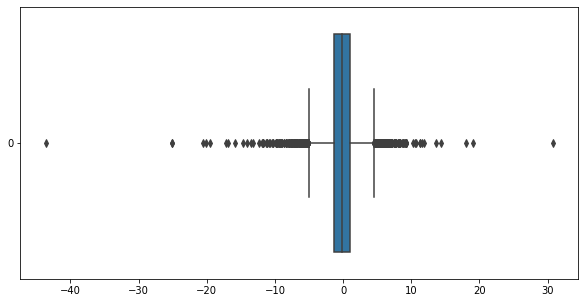

In [69]:
# boxplot of feature "Income_dpvn_19-16_%" 
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(data=df_income1619["Income_dpvn_19-16_%"], orient="h")

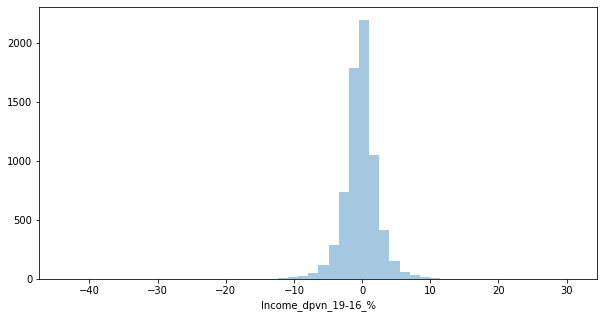

In [70]:
# Plot histogram  of feature "Income_dpvn_19-16_%" with binsize determined automatically
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.distplot(df_income1619['Income_dpvn_19-16_%'], kde=False)

In [71]:
# summary of dataframe produced
df_income1619.describe()

Income_dpvn_2019_%  Income_dpvn_2016_%  Income_dpvn_19-16_%  \
count         6972.000000         6972.000000          6972.000000   
mean            12.288095           12.506870            -0.218775   
std              9.606421            9.682893             2.619187   
min              0.000000            0.000000           -43.600000   
25%              4.500000            4.700000            -1.400000   
50%              9.600000            9.900000            -0.200000   
75%             17.925000           18.000000             1.000000   
max             58.700000           73.200000            30.800000   

       Total_pop_19-16  Score_income_dpvn  
count      6972.000000        6972.000000  
mean          0.012333           3.501721  
std           0.091438           1.305835  
min          -0.662000           1.000000  
25%          -0.030000           3.000000  
50%          -0.003000           4.000000  
75%           0.028000           4.000000  
max           1.250000           6.000000

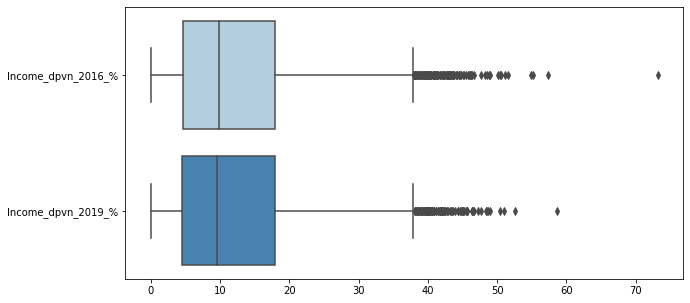

In [72]:
# boxplot of income deprivation for both years
fig, ax = plt.subplots(figsize=(10, 5))
ax = sns.boxplot(data=df_income1619[["Income_dpvn_2016_%", "Income_dpvn_2019_%"]], orient="h", palette="Blues")

In [75]:
# saving dataframe to csv
df_income1619[["Datazones", "Income_dpvn_2016_%", "Income_dpvn_2019_%", "Income_dpvn_19-16_%", "Score_income_dpvn"]].to_csv('/home/ls283h/Work/SIMD/income_%_score.csv', index=False)

# Comparison - Scatterplot and Correlation

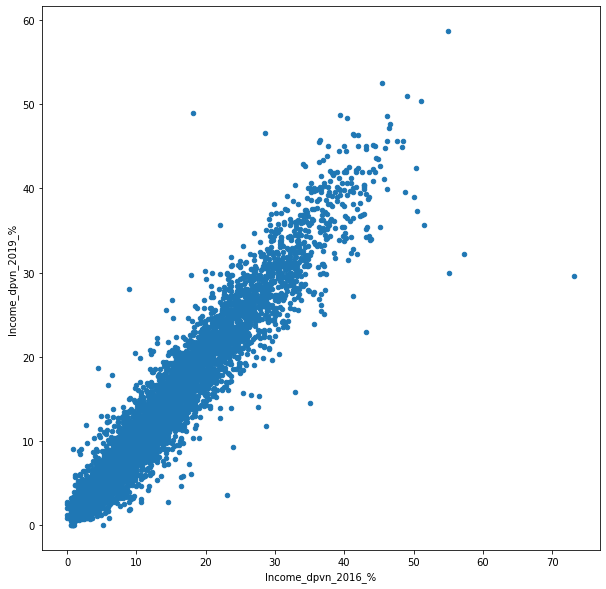

In [73]:
# scatterplot of employment deprivation for both years
df_income1619.plot.scatter(x='Income_dpvn_2016_%', y='Income_dpvn_2019_%', figsize=(10,10))

In [74]:
# correlation between income deprivations
df_income1619['Income_dpvn_2016_%'].corr(df_income1619['Income_dpvn_2019_%'], method='pearson').round(3)

0.963

# Mapping to see what patterns in places gaining/losing income depvn

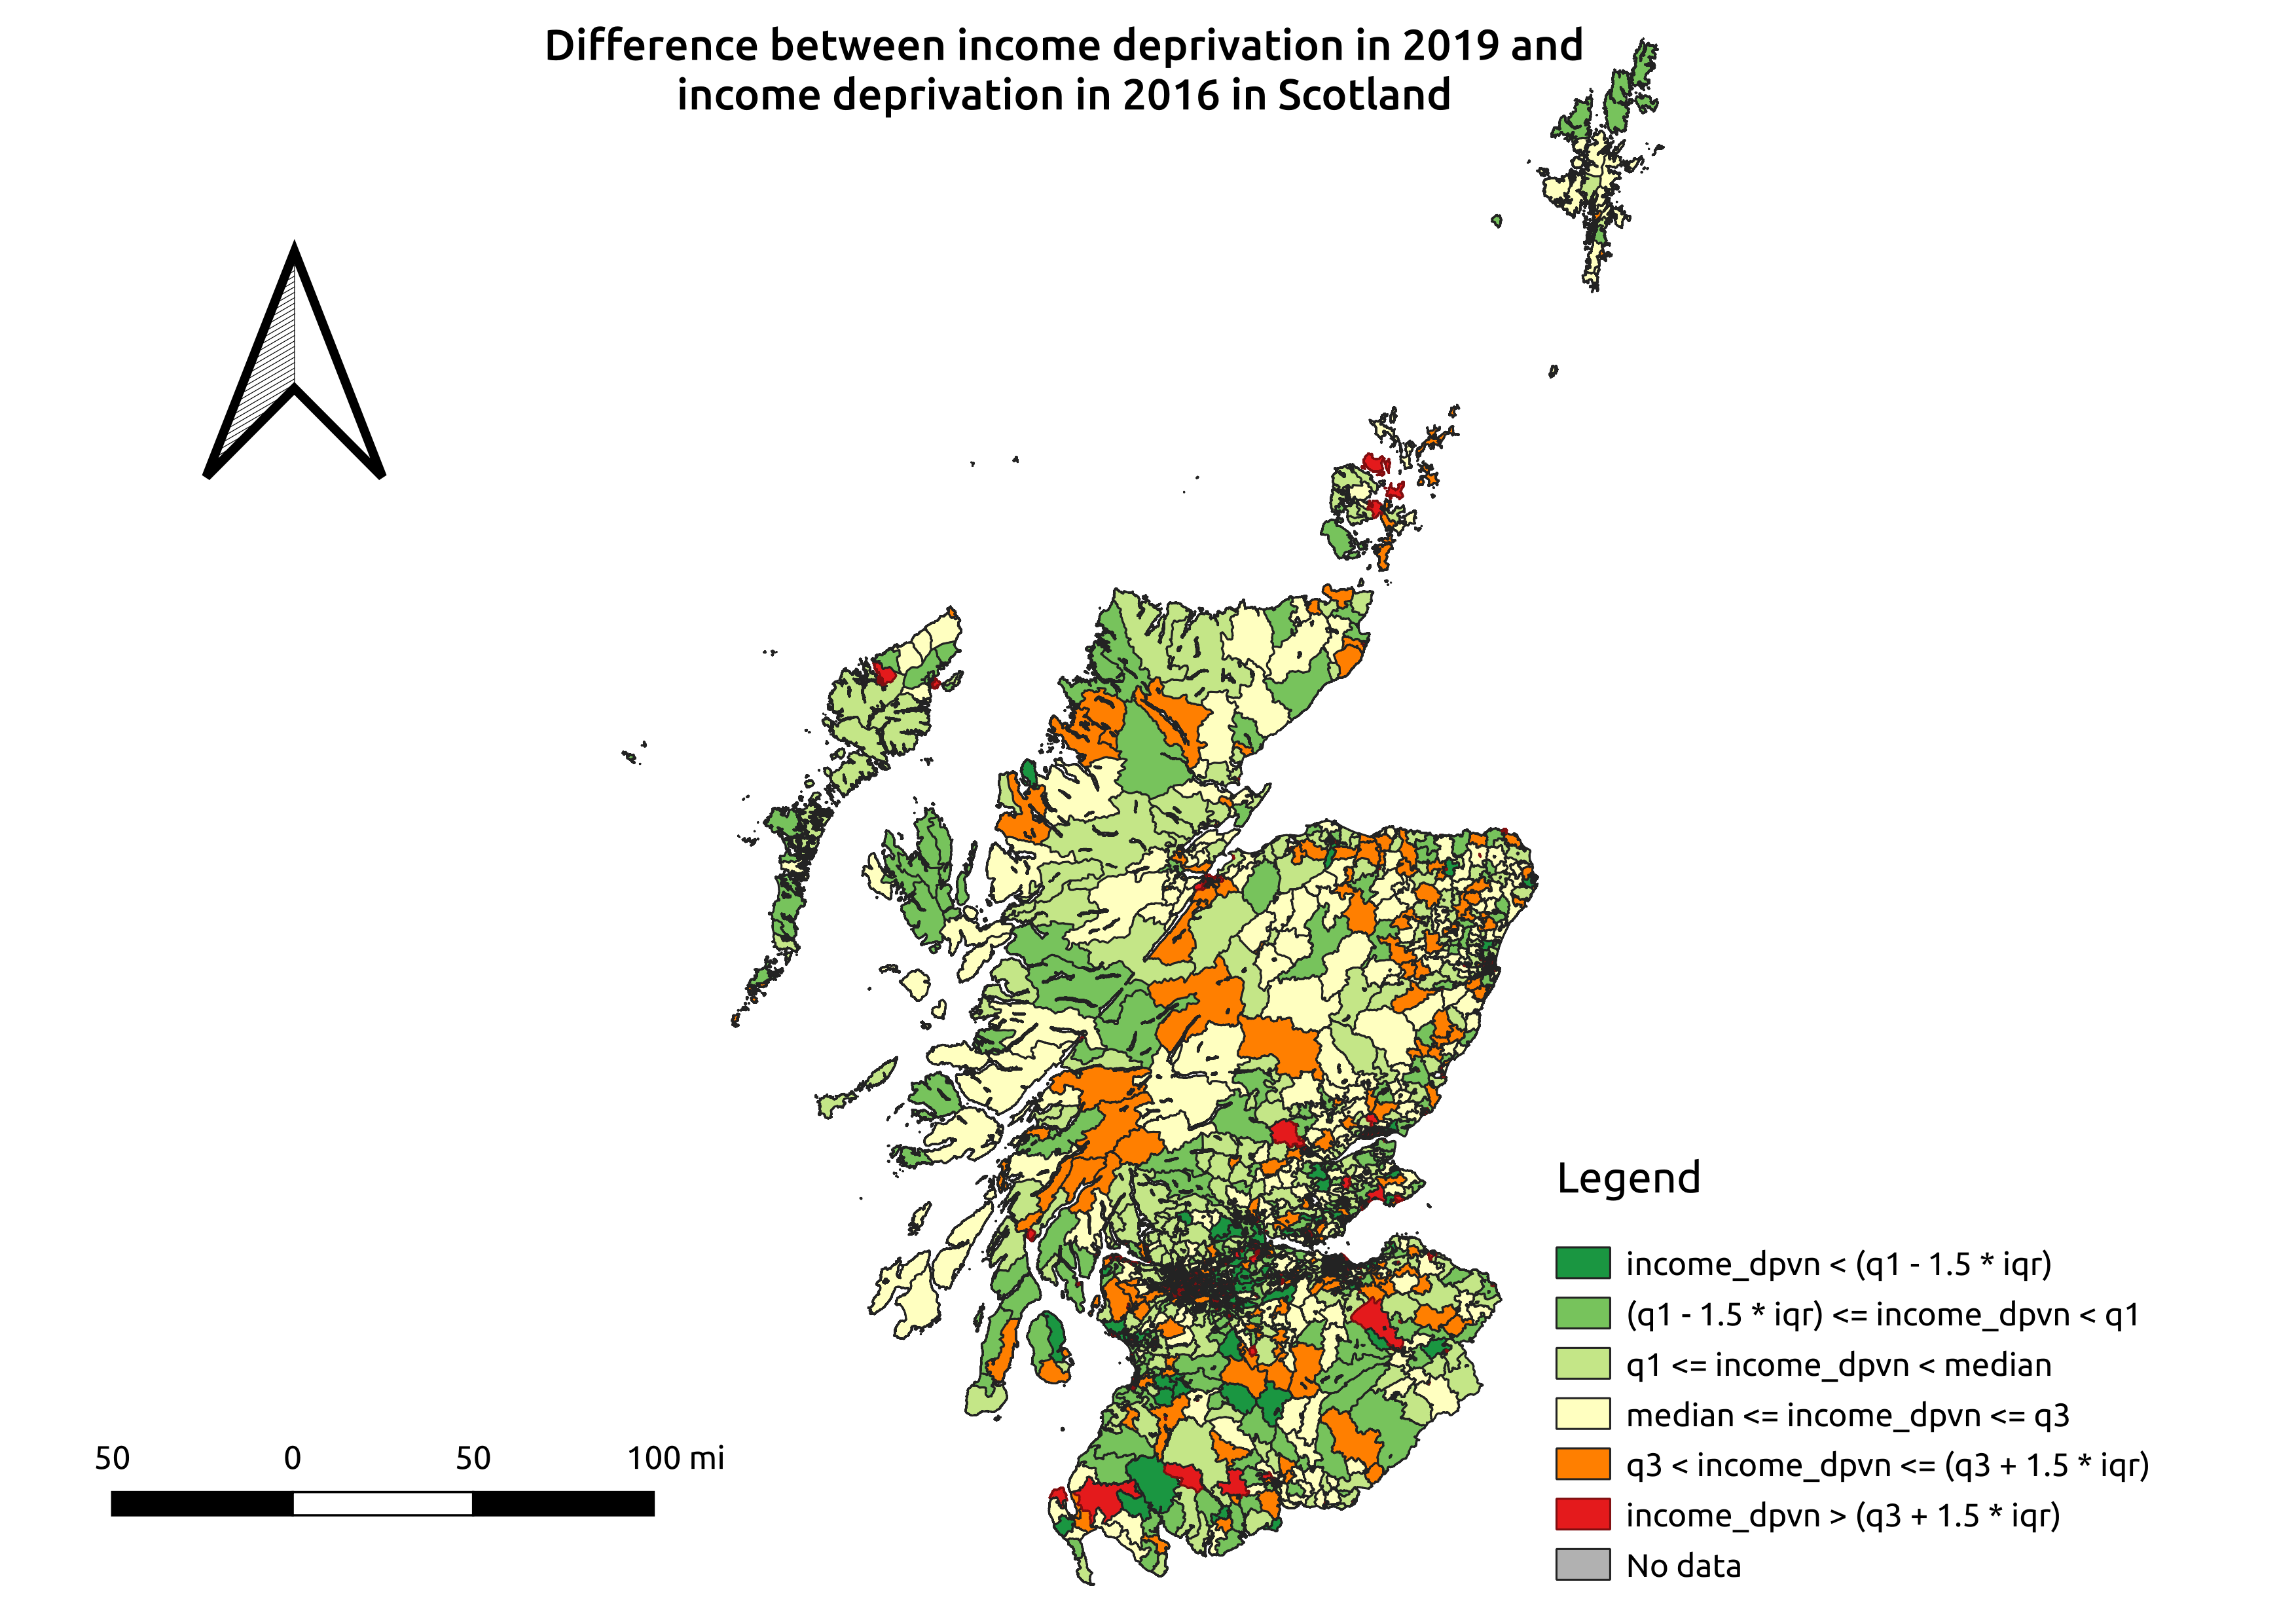

In [76]:
# SCOTLAND
from IPython.display import Image
Image("/home/ls283h/Work/SIMD/gis/outputs/Scotland_income.png")

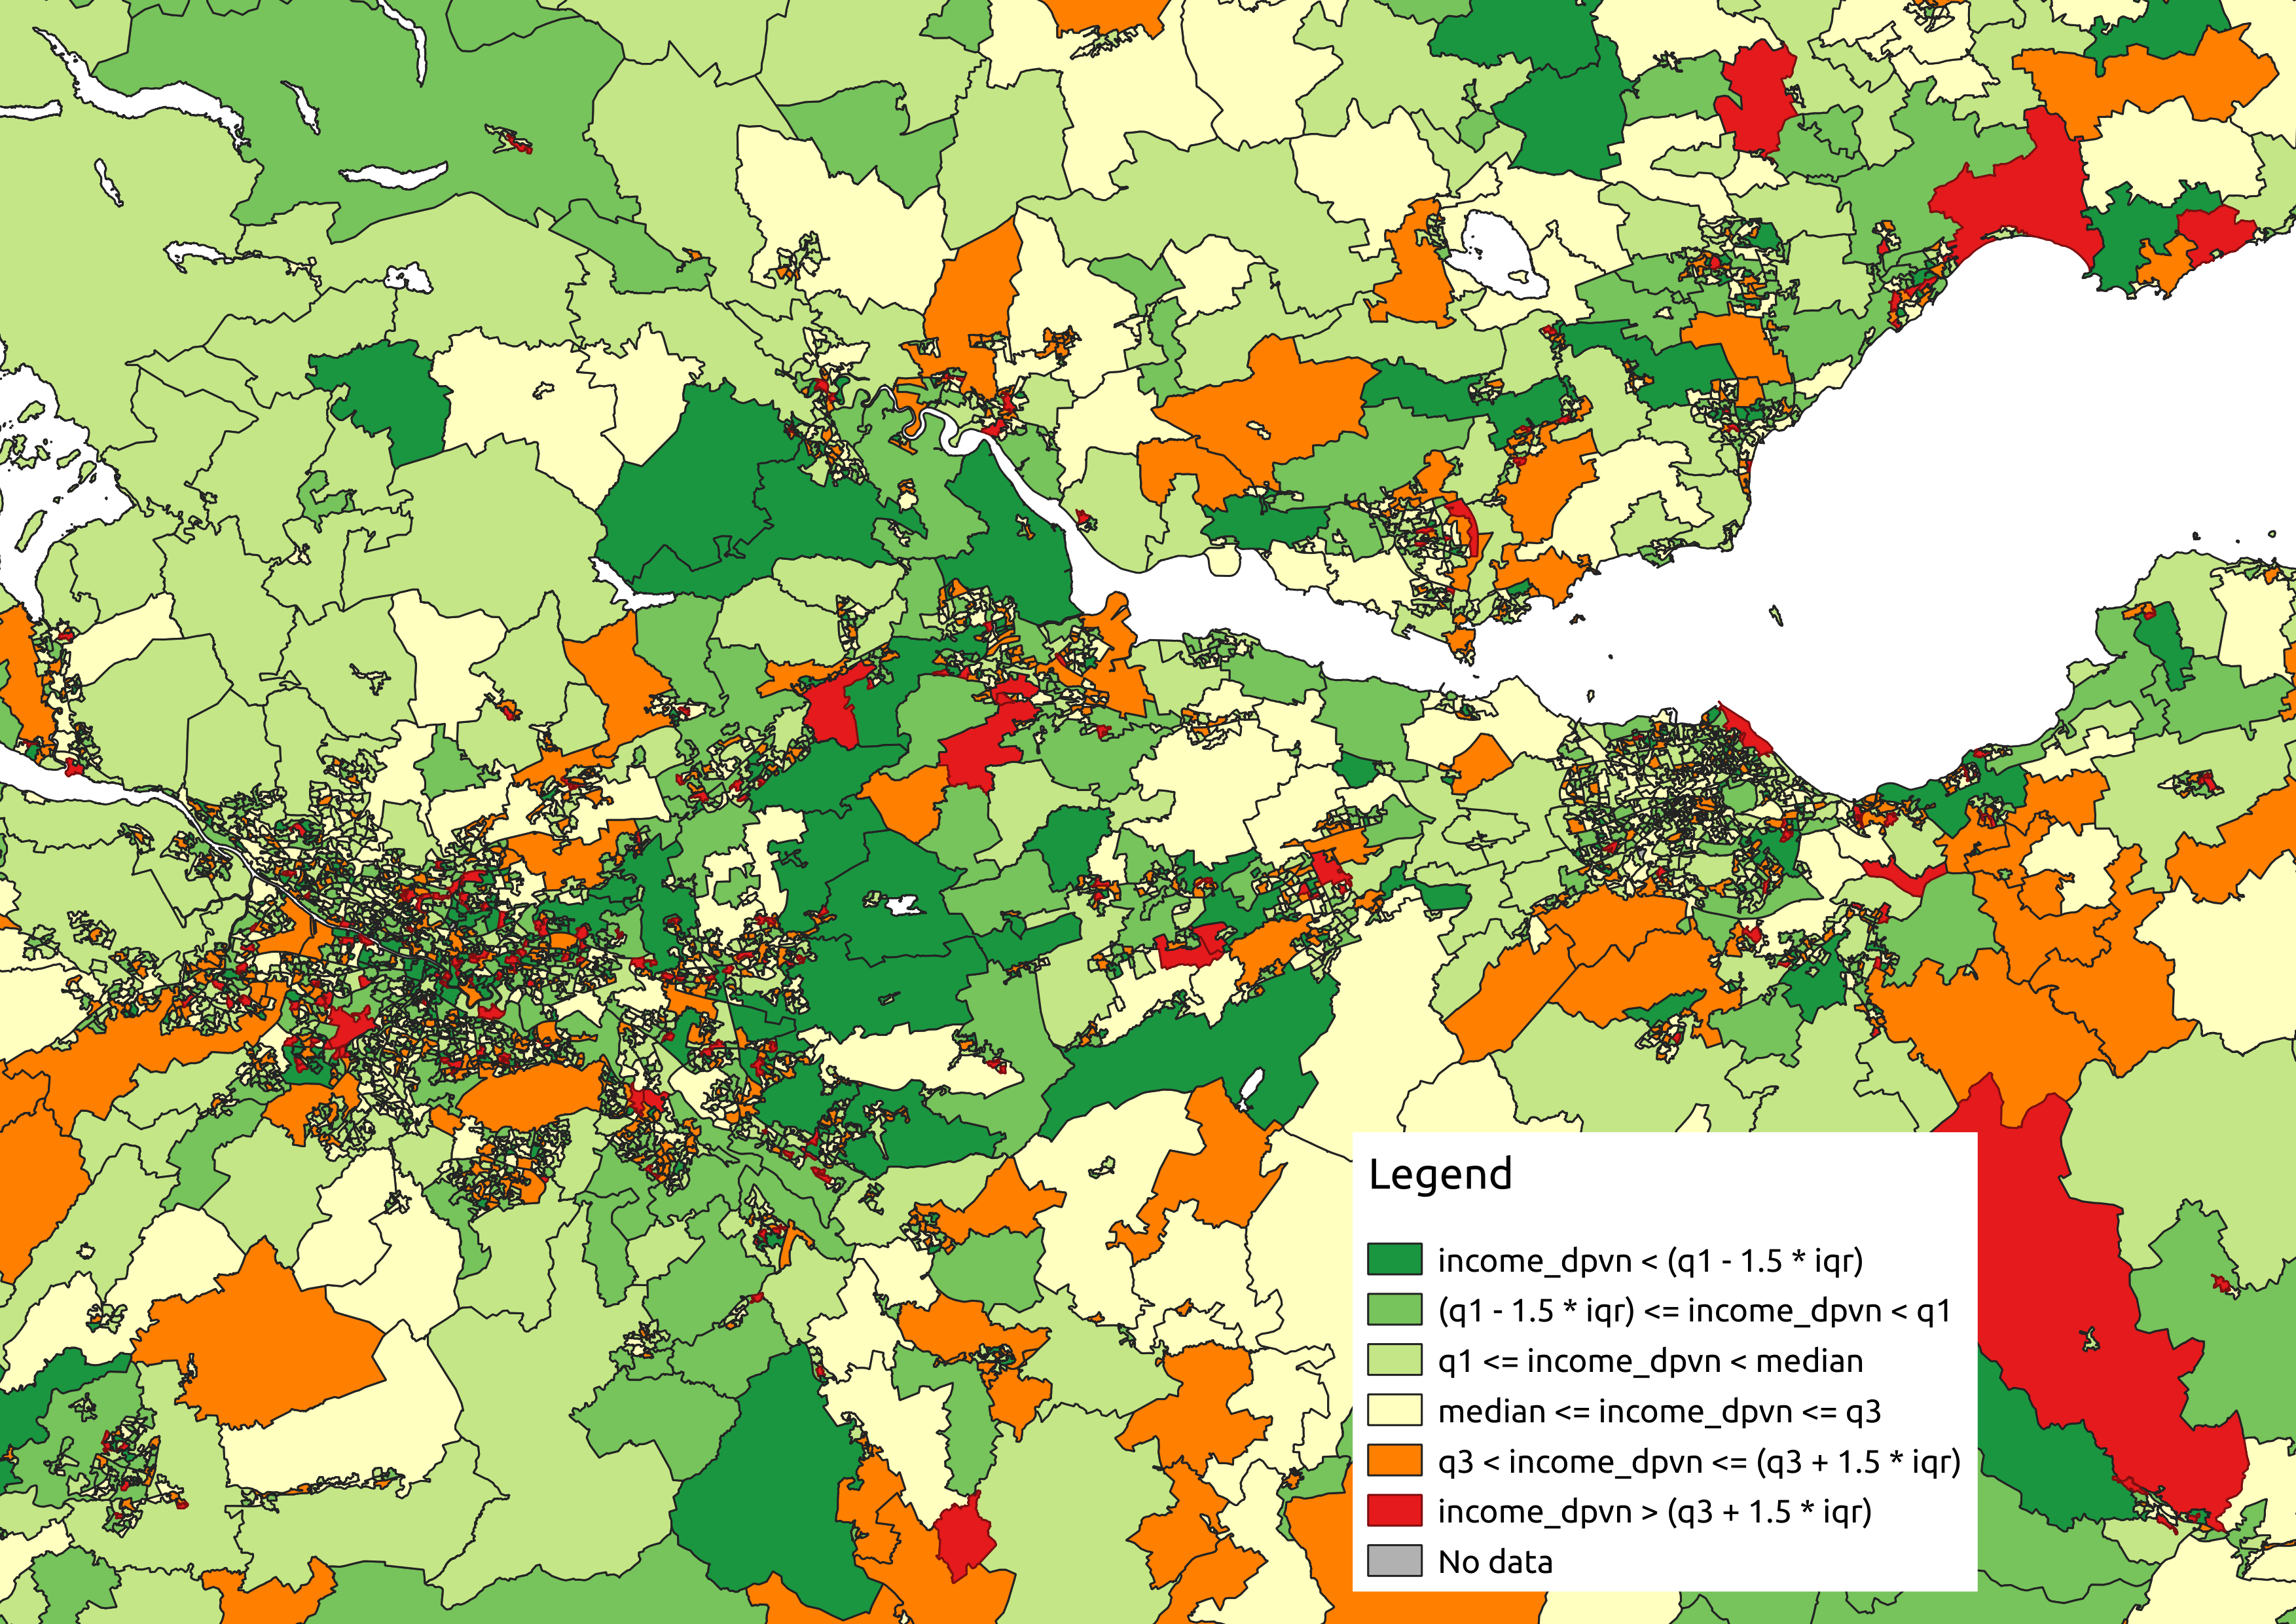

In [77]:
# Extract of the central belt
from IPython.display import Image
Image("/home/ls283h/Work/SIMD/gis/outputs/Central_belt_income.png")

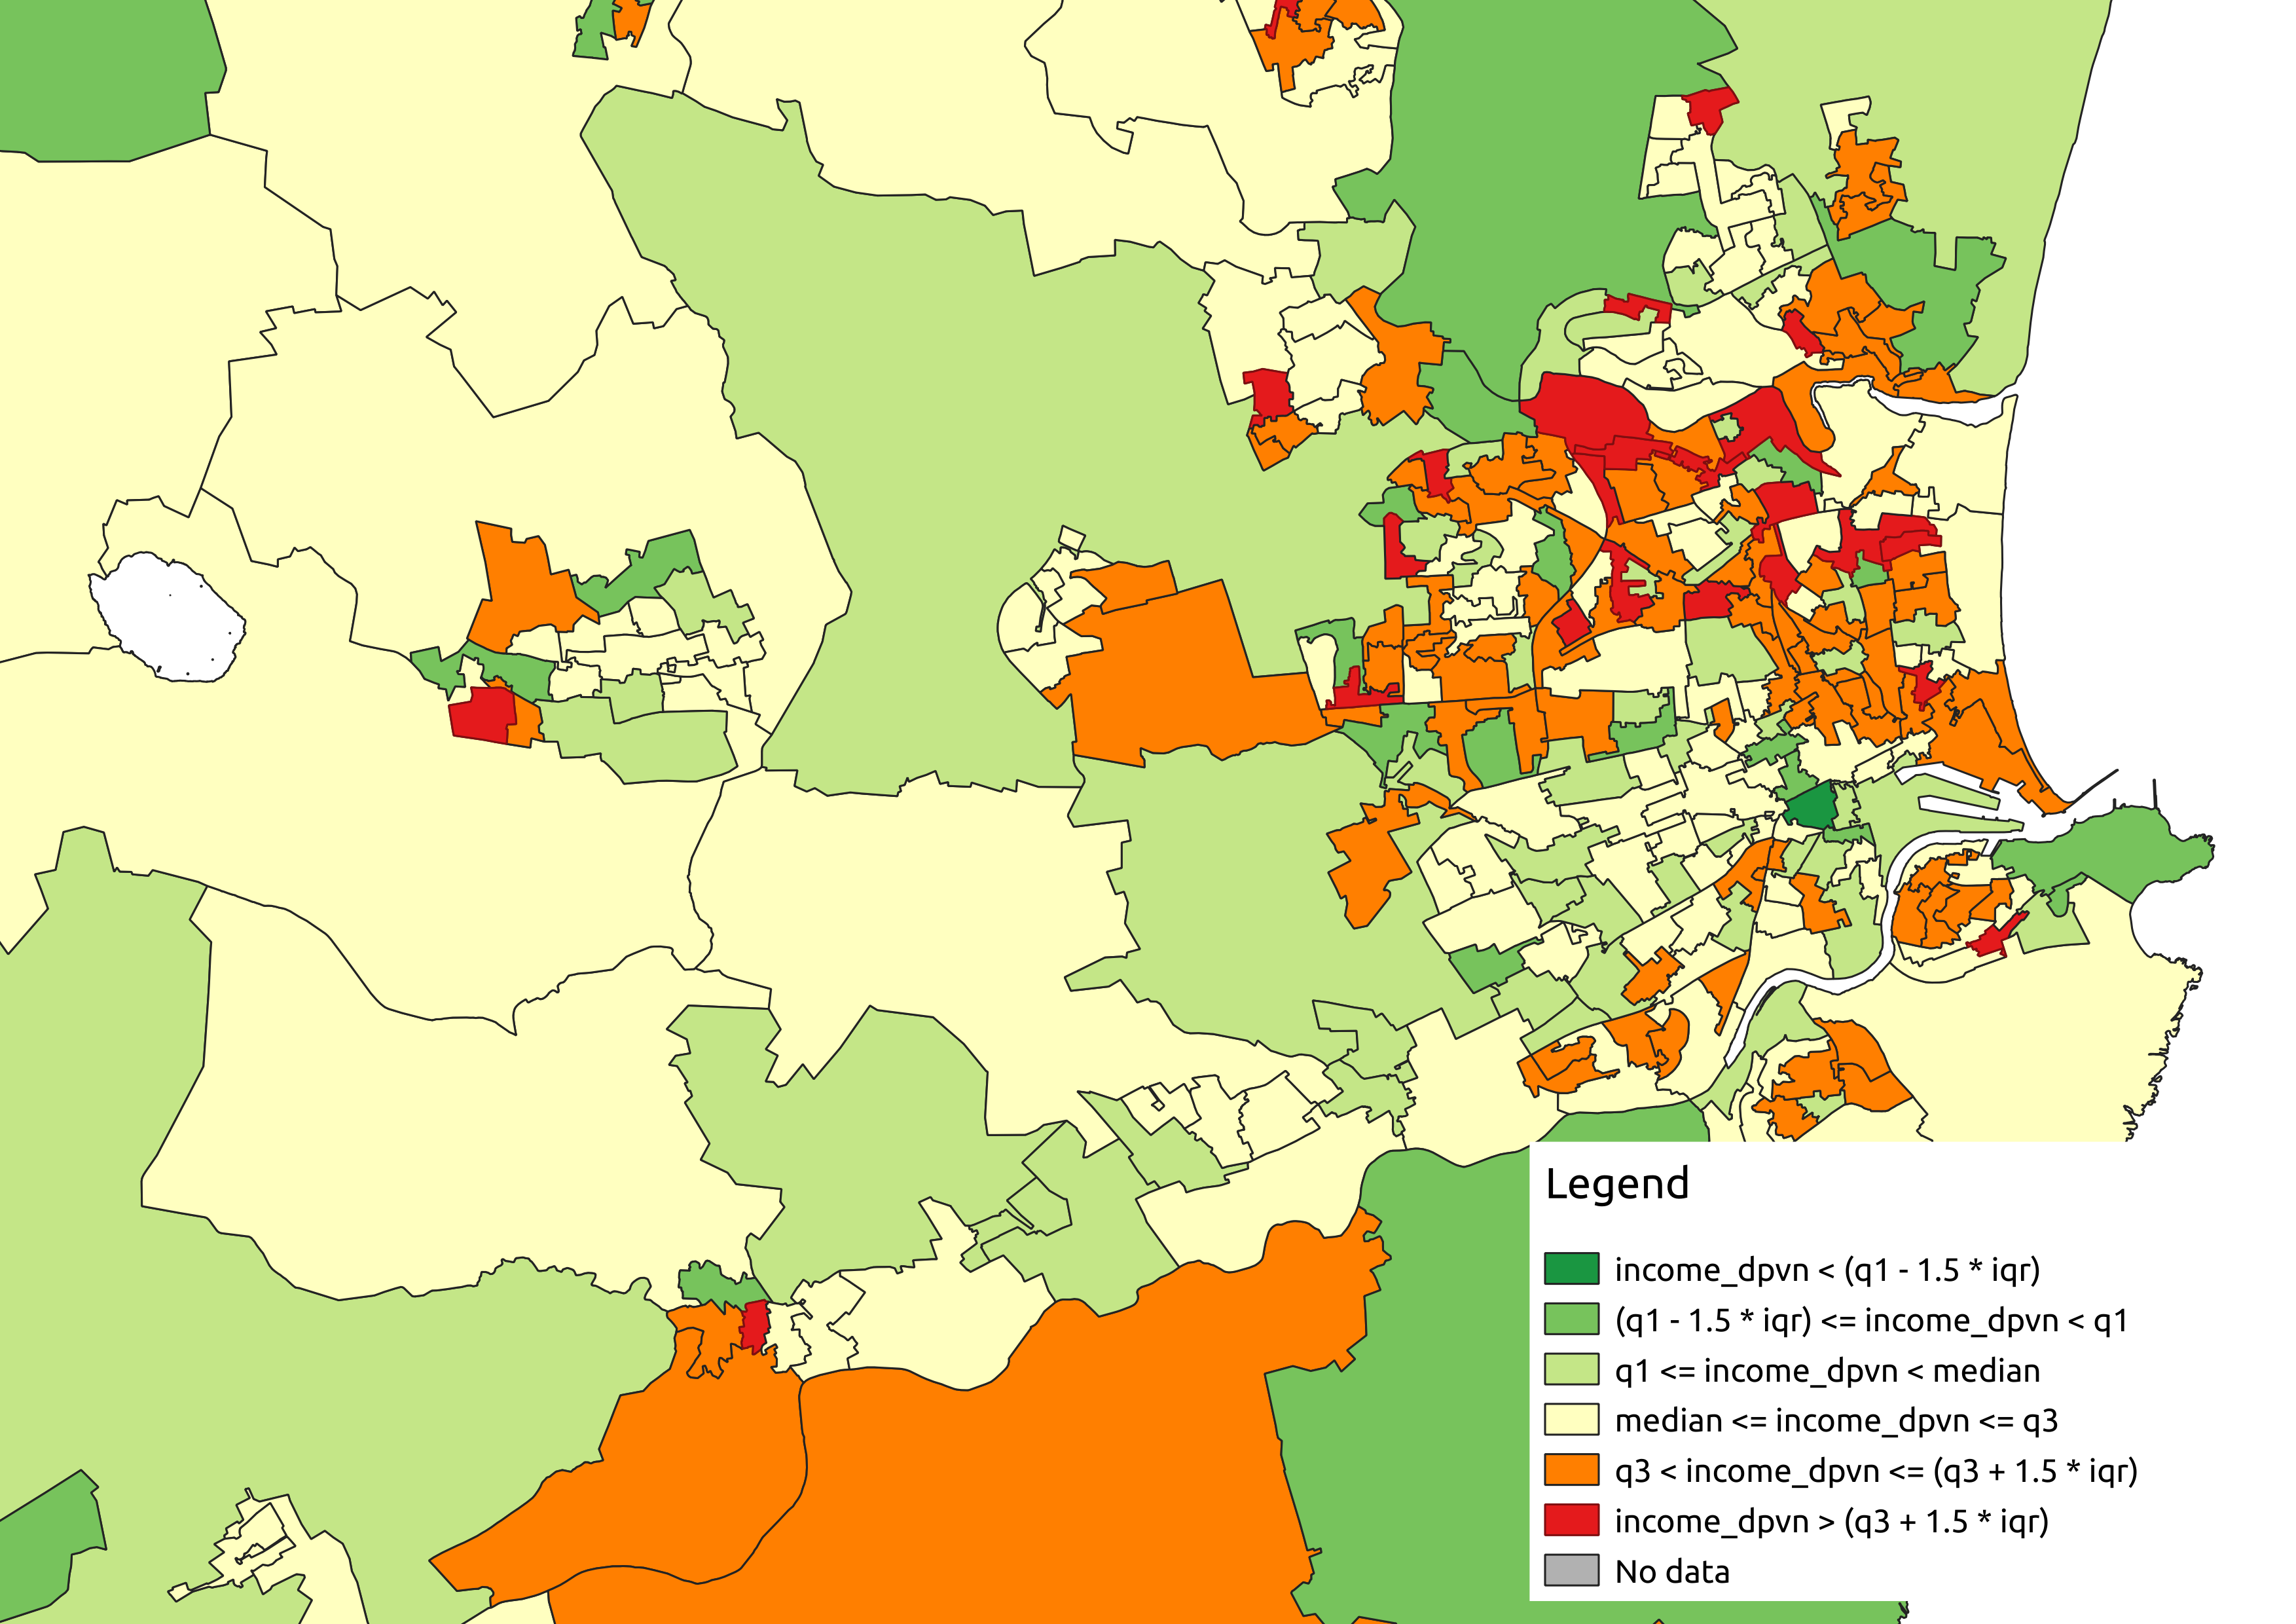

In [78]:
# Extract of Aberdeen region
from IPython.display import Image
Image("/home/ls283h/Work/SIMD/gis/outputs/Aberdeen_income.png")

# "Sense" of patterning in rural areas

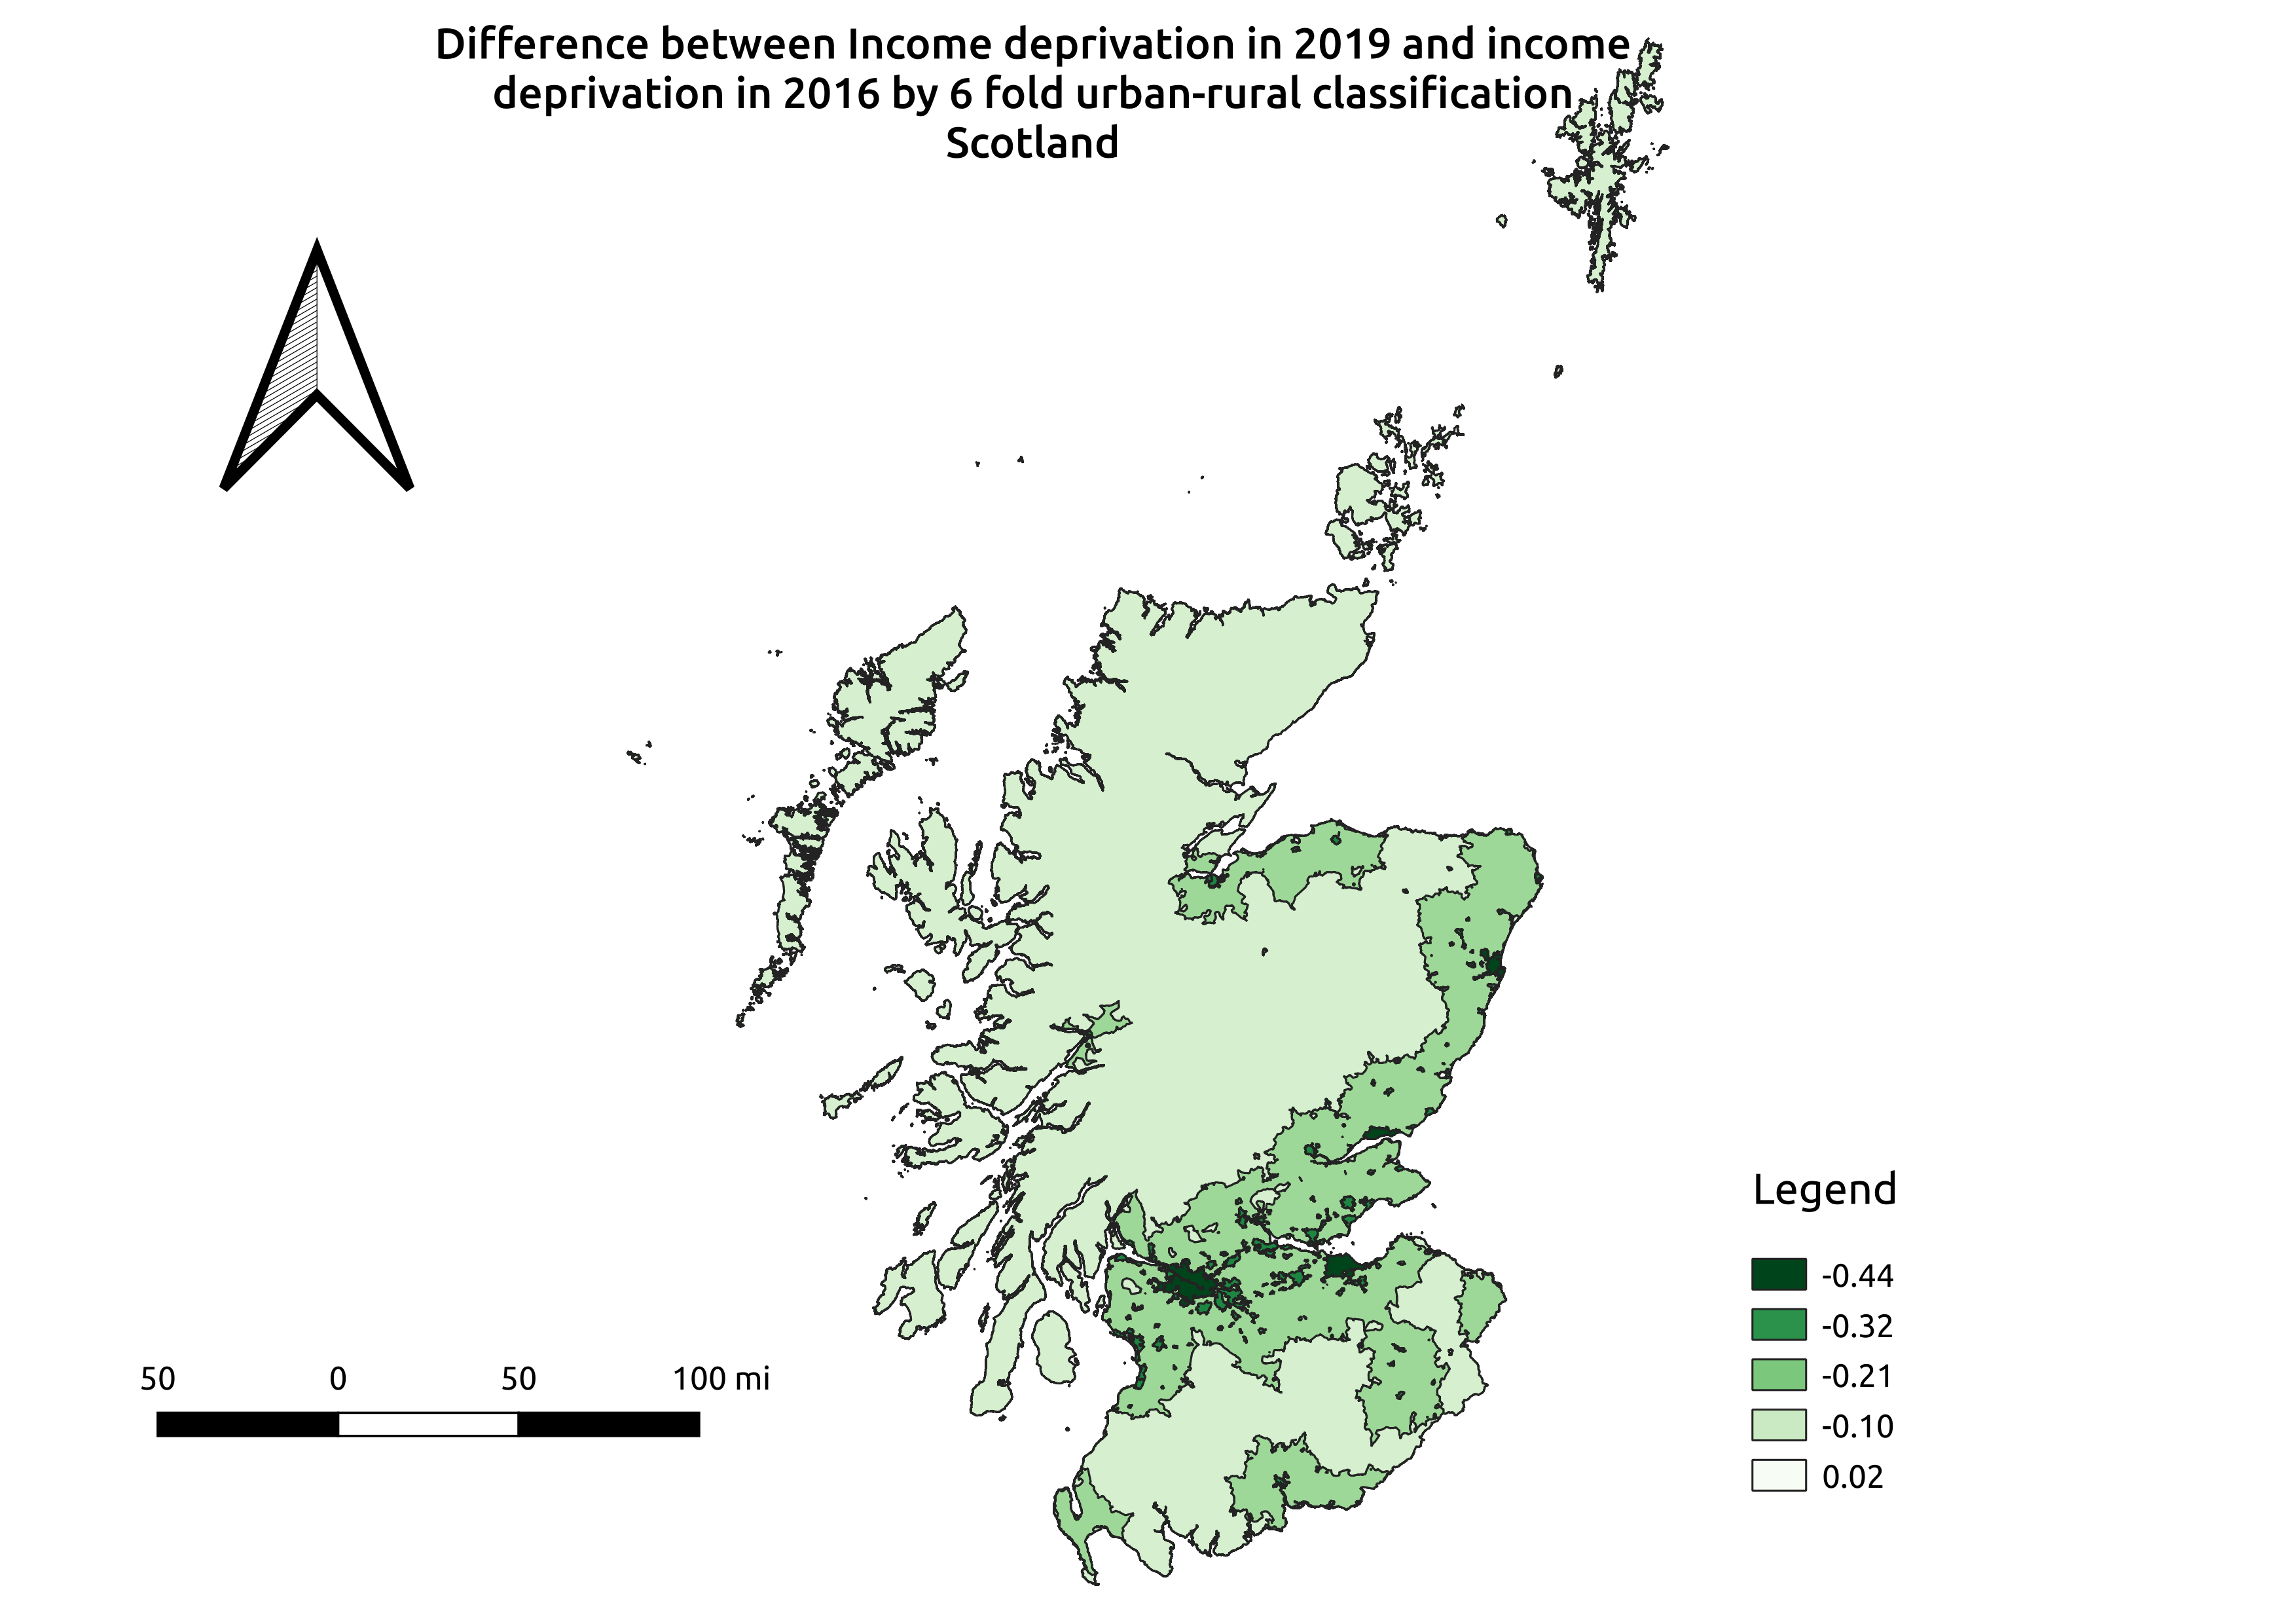

In [85]:
from IPython.display import Image
Image("/home/ls283h/Work/SIMD/gis/outputs/Scotland_income_6Fold.png")

# correlation of start vs change measure

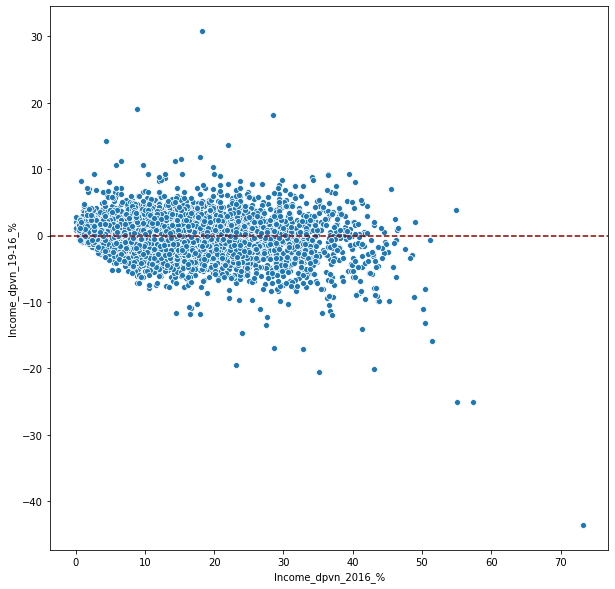

In [79]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(x="Income_dpvn_2016_%", y="Income_dpvn_19-16_%", data=df_income1619)
ax.axhline(0, ls='--', color='darkred')

In [80]:
# Correlation
df_income1619['Income_dpvn_2016_%'].corr(df_income1619['Income_dpvn_19-16_%'], method='pearson').round(3)

-0.164

# change in dpvn vs change in population

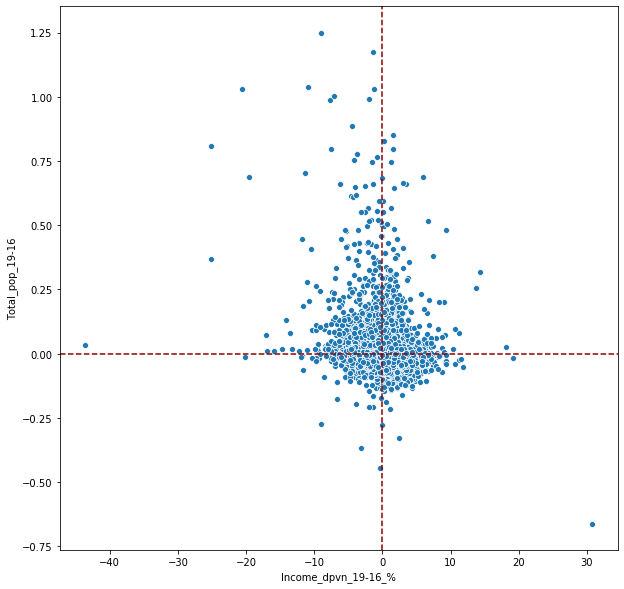

In [86]:
fig, ax = plt.subplots(figsize=(10, 10))
ax = sns.scatterplot(x="Income_dpvn_19-16_%", y="Total_pop_19-16", data=df_income1619)
ax.axhline(0, ls='--', color='darkred')
ax.axvline(0, ls='--', color='darkred')

In [88]:
# Top 5 datazones with biggest drop in dpvn
df_drop_dpvn = df_income1619.nsmallest(5, ['Income_dpvn_19-16_%']).loc[:,['Datazones', 'Intermediate zone', 'Local authority', 'Income_dpvn_19-16_%']]
df_drop_dpvn

Datazones                   Intermediate zone    Local authority  \
2203  S01008710                             Niddrie  City of Edinburgh   
3543  S01010050       Parkhead West and Barrowfield       Glasgow City   
3641  S01010148  Old Shettleston and Parkhead North       Glasgow City   
3260  S01009767                       Darnley North       Glasgow City   
6851  S01013361                           Blackburn       West Lothian   

      Income_dpvn_19-16_%  
2203                -43.6  
3543                -25.1  
3641                -25.1  
3260                -20.6  
6851                -20.1

In [89]:
# Top 5 datazones with highest rise in dpvn
df_high_dpvn = df_income1619.nlargest(5, ['Income_dpvn_19-16_%']).loc[:,['Datazones', 'Intermediate zone', 'Local authority', 'Income_dpvn_19-16_%']]
df_high_dpvn

Datazones                   Intermediate zone    Local authority  \
3699  S01010207                          Petershill       Glasgow City   
2199  S01008706                             Niddrie  City of Edinburgh   
3516  S01010023           Gorbals and Hutchesontown       Glasgow City   
3642  S01010149  Old Shettleston and Parkhead North       Glasgow City   
1291  S01007797                              Fintry        Dundee City   

      Income_dpvn_19-16_%  
3699                 30.8  
2199                 19.1  
3516                 18.1  
3642                 14.3  
1291                 13.7